In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import random

In [101]:
X,Y=datasets.make_classification(n_samples=500, n_features=4,n_classes=2,n_redundant=1)

In [102]:
df=pd.DataFrame(X,columns=['feature1','feature2','feature3','feature4'])
df['label']=Y

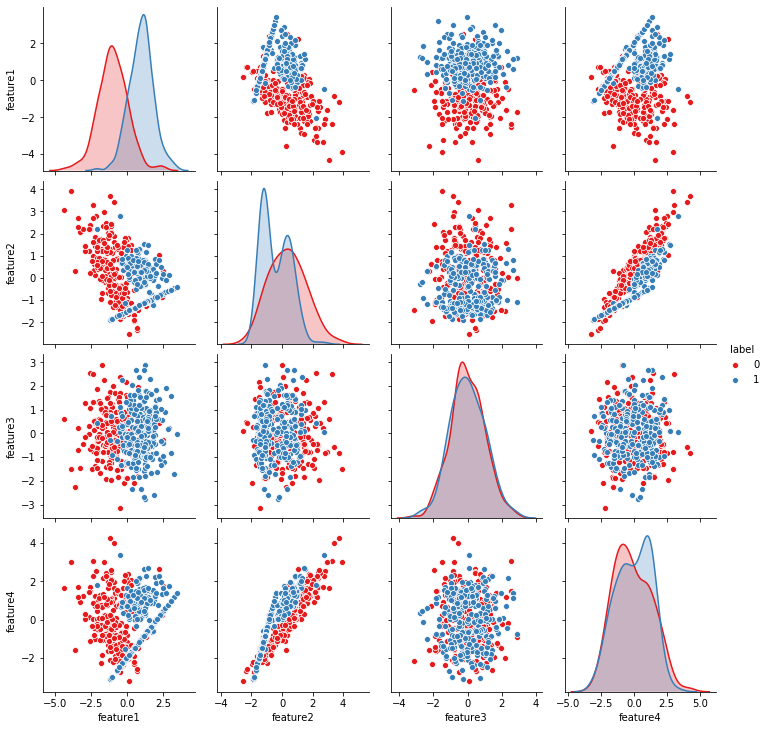

In [103]:
df.head(20)
sns.pairplot(df, hue='label',palette='Set1')



In [104]:
df.to_csv('random.csv',index=False)


In [105]:
df1=pd.read_csv('random.csv')

In [106]:
df1.head(20)


,feature1,feature2,feature3,feature4,label
0,-0.602357,-1.764600,1.439921,-2.655653,0
1,-0.912784,1.626687,0.183989,1.636405,0
2,-1.541627,-0.165427,-0.151011,-1.070107,0
3,1.113364,-1.139499,0.658941,-0.884256,1
4,0.341267,0.313848,-2.359129,0.601782,1
5,2.533108,-0.685108,-1.194566,0.498803,1
6,-0.164934,0.894013,0.515268,1.085529,0
7,1.641801,-0.738971,0.402861,-0.064898,1
8,-0.791404,0.392355,0.499018,0.078860,0
9,1.282808,0.135051,-0.672845,0.887024,1


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 1)


In [108]:
print(y_train)

[0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0
 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1
 1 1 0 1 0]


In [109]:
class Perceptron:
    def __init__(self,input_size,epochs=100,alpha=0.02):
        self.epochs = epochs
        self.alpha = alpha
        self.input_size = input_size
        weight = [random.random() for i in range(input_size+1)]
        weight[0] = 1.0
        self.weight = weight

    def activation(self,x):
        return int(1 / (1 + np.exp(-x)))
    def predict(self,x):
       
        z = np.dot(self.weight,x)


        a = self.activation(z)
        return a
   
    
    def learn(self,X,d):
        final = []
        for k in range(self.epochs):
            print('Interation',(k+1))
            sum = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x)
                e = (d[i] - y)
                self.weight = self.weight + self.alpha*e*x
                sum = sum + e
            final.append(abs(sum))
            print("Error=",str(sum))
            print('Weights=',self.weight)



In [110]:
perceptron=Perceptron(input_size=4)
perceptron.learn(X_train,y_train)


Interation 1
Error= 183
Weights= [ 4.66        4.29563209 -1.31488423  0.45825902  0.91964276]
Interation 2
Error= 183
Weights= [ 8.32        7.61903674 -2.66063375  0.60115789  0.98584926]
Interation 3
Error= 179
Weights= [11.9        10.70598262 -3.98724338  0.7034581   0.94650978]
Interation 4
Error= 157
Weights= [15.04       12.98000388 -5.04007461  0.57300705  0.81805703]
Interation 5
Error= 123
Weights= [17.5        14.24569389 -5.67420052  0.29327272  0.68320673]
Interation 6
Error= 102
Weights= [19.54       15.05357534 -5.96781754  0.13852548  0.74341956]
Interation 7
Error= 84
Weights= [21.22       15.49231141 -6.111773    0.15246483  0.79651962]
Interation 8
Error= 67
Weights= [22.56       15.63630467 -6.11020401  0.17192179  0.87819883]
Interation 9
Error= 63
Weights= [23.82       15.73841556 -6.00174148  0.2238086   1.07741707]
Interation 10
Error= 55
Weights= [24.92       15.69327702 -5.96728183  0.20562449  1.09781654]
Interation 11
Error= 51
Weights= [25.94       15.5949

Error= 1
Weights= [36.72        0.03706836 -0.12606323 -0.03867587  0.12983255]
Interation 85
Error= 0
Weights= [ 3.67200000e+01 -6.21236207e-03 -1.16302749e-01  9.77610118e-04
  1.18749563e-01]
Interation 86
Error= 0
Weights= [ 3.67200000e+01  3.01052299e-02 -1.39595219e-01 -1.46628078e-02
  1.08171493e-01]
Interation 87
Error= 0
Weights= [ 3.67200000e+01  1.70084700e-02 -1.32590759e-01  3.48085084e-03
  1.10149717e-01]
Interation 88
Error= 0
Weights= [ 3.67200000e+01  2.30580331e-03 -1.35529194e-01  5.71460721e-04
  9.81529547e-02]
Interation 89
Error= 0
Weights= [ 3.67200000e+01 -2.72800556e-03 -1.30240657e-01 -9.33955340e-03
  1.02330656e-01]
Interation 90
Error= -1
Weights= [ 3.67000000e+01  8.27983273e-03 -1.29759080e-01  7.99572969e-04
  1.09050766e-01]
Interation 91
Error= 1
Weights= [ 3.67200000e+01  9.71427465e-03 -1.36235410e-01 -3.41648238e-02
  1.01319569e-01]
Interation 92
Error= 1
Weights= [ 3.67400000e+01  1.90993196e-02 -1.20953628e-01 -9.86421454e-03
  1.26622823e-01]

In [111]:
y_pred = []
for i in range(X_train.shape[0]):
    x= np.insert(X_train[i],0,1)
    y_pred.append(perceptron.predict(x))
y_actu = pd.Series(y_train,name = 'Actual')
y_pred = pd.Series(y_pred,name = 'Predicted')

conftrain = pd.crosstab(y_pred,y_actu)
print('Confusion Matrix for Training data\n',conftrain)
accuracy=(conftrain[0][0]+conftrain[1][1])/(conftrain[0][0]+conftrain[1][0]+conftrain[0][1]+conftrain[1][1])
    

Confusion Matrix for Training data
 Actual       0    1
Predicted          
0          151   29
1           41  154


In [112]:
print("Training data Accuracy = " +str(accuracy))


Training data Accuracy = 0.8133333333333334


In [113]:
y_pred = []
for i in range(X_test.shape[0]):
    x= np.insert(X_test[i],0,1)
    y_pred.append(perceptron.predict(x))
y_actu = pd.Series(y_test,name = 'Actual')
y_pred = pd.Series(y_pred,name = 'Predicted')

conftest = pd.crosstab(y_pred,y_actu)
print('Confusion Matrix for Testing data\n',conftest)
accuracy=(conftest[0][0]+conftest[1][1])/(conftest[0][0]+conftest[1][0]+conftest[0][1]+conftest[1][1])
    

Confusion Matrix for Testing data
 Actual      0   1
Predicted        
0          46  16
1           9  54


In [114]:
print("Testing data Accuracy = " +str(accuracy))

Testing data Accuracy = 0.8


In [115]:

y_pred = []
for i in range(X.shape[0]):
    x= np.insert(X[i],0,1)
    y_pred.append(perceptron.predict(x))
y_actu = pd.Series(Y,name = 'Actual')
y_pred = pd.Series(y_pred,name = 'Predicted')

df_confusion = pd.crosstab(y_pred,y_actu)
print('Metrices for whole data\n')
print('\nConfusion Matrix\n\n',df_confusion)
precision=df_confusion[0][0]/(df_confusion[0][0]+df_confusion[0][1])
print('\nPrecision : ',precision)
recall=df_confusion[0][0]/(df_confusion[0][0]+df_confusion[1][0])
print('\nRecall : ',recall)
accuracy=(df_confusion[0][0]+df_confusion[1][1])/(df_confusion[0][0]+df_confusion[1][0]+df_confusion[0][1]+df_confusion[1][1])
print('\nAccuracy : ',accuracy)

Metrices for whole data


Confusion Matrix

 Actual       0    1
Predicted          
0          197   45
1           50  208

Precision :  0.7975708502024291

Recall :  0.8140495867768595

Accuracy :  0.81


In [83]:
#THANK YOU